In [1]:
import numpy as np
import pandas as pd
from sklearn.utils import shuffle

C:\Users\minji\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Load Training Dataset

In [2]:
df_train = pd.read_csv("Training_set_home_work.csv")

In [3]:
df_train["Label"].value_counts()

0    9450
1    9362
Name: Label, dtype: int64

In [4]:
df_train  = df_train.drop(["Unnamed: 0"], axis=1)

In [5]:
X_train = df_train.iloc[:,2:-1]

In [6]:
X_train = np.array(X_train)

In [7]:
y_train = np.array(df_train["Label"])

In [8]:
print(X_train.shape, y_train.shape)

(18812, 1024) (18812,)


In [9]:
X_train_shuffled, y_train_shuffled = shuffle(X_train, y_train, random_state = 42)

In [10]:
print(X_train_shuffled.shape, y_train_shuffled.shape)

(18812, 1024) (18812,)


## Split the data into 90 % training and 10 % testing 

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

X_train, X_test, Y_train, Y_test = train_test_split(X_train_shuffled, y_train_shuffled, test_size = 0.1, random_state = 42)

## Check the shapes of the dataset

In [12]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(16930, 1024) (1882, 1024) (16930,) (1882,)


## Logistic Regression

In [13]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

In [14]:
clf_LR = LogisticRegression()
clf_LR.fit(X_train, Y_train)

C:\Users\minji\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Import Efficiency Matrices

In [15]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import matthews_corrcoef

In [16]:
y1_pred = clf_LR.predict(X_test)

In [17]:
y1_pred

array([0, 1, 1, ..., 0, 0, 1], dtype=int64)

## Confusion Matrix

In [18]:
cm = confusion_matrix(Y_test, y1_pred)

In [19]:
cm

array([[851, 101],
       [105, 825]], dtype=int64)

In [20]:
TP = cm[1][1]
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]

In [21]:
print(TP, TN, FP, FN)

825 851 101 105


## Accuracy

In [22]:
acc = (TP + TN) / (TP + TN + FP + FN)
acc

0.8905419766206164

In [23]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(Y_test, y1_pred)
print(acc)

0.8905419766206164


## MCC (Matthews correlation coefficient)

In [24]:
from sklearn.metrics import matthews_corrcoef
MCC = matthews_corrcoef(Y_test, y1_pred)
print(MCC)

0.7810502121214115


## Misclassification

In [25]:
Misclassification = (FP + FN) / (TP + TN + FP + FN)
Misclassification

0.10945802337938364

## Sensitivity == Recall

In [26]:
Sensitivity = TP / (TP + FN)
Sensitivity

0.8870967741935484

In [27]:
from sklearn.metrics import recall_score
rcc = recall_score(Y_test, y1_pred)
print(rcc)

0.8870967741935484


## Specificity

In [52]:
Specificity = TN / (TN + FP)
Specificity

0.9317226890756303

## Precision

In [53]:
Precision = TP / (TP + FP)
Precision

0.9285714285714286

## F1 Score

In [54]:
F1_score = 2*(Precision*Sensitivity)/(Precision+Sensitivity)

print("F1_score   : ", F1_score)

F1_score   :  0.9184782608695652


## SVM

In [55]:
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
df_train = pd.read_csv("Training_set_home_work.csv")

df_train["Label"].value_counts()
df_train  = df_train.drop(["Unnamed: 0"], axis=1)
X_train = df_train.iloc[:,2:-1]
X_train = np.array(X_train)
y_train = np.array(df_train["Label"])
X_train_shuffled, y_train_shuffled = shuffle(X_train, y_train, random_state = 42)

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

X_train, X_test, Y_train, Y_test = train_test_split(X_train_shuffled, y_train_shuffled, test_size = 0.1, random_state = 42)



In [56]:
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
X = np.array([[-1, -1], [-2, -1], [1, 1], [2, 1]])
y = np.array([1, 1, 2, 2])
from sklearn.svm import SVC
clf_S = make_pipeline(StandardScaler(), SVC(gamma='auto'))


In [57]:
clf_S.fit(X_train, Y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

## Import Efficiency Matrices

In [58]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import matthews_corrcoef

In [59]:
y2_pred = clf_S.predict(X_test)

In [60]:
y2_pred

array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

## Confusion Matrix

In [37]:
cm = confusion_matrix(Y_test, y2_pred)

In [38]:
cm

array([[887,  65],
       [ 85, 845]], dtype=int64)

In [39]:
TP = cm[1][1]
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]

In [40]:
print(TP, TN, FP, FN)

845 887 65 85


## Accuracy

In [41]:
acc = (TP + TN) / (TP + TN + FP + FN)
acc

0.9202975557917109

## MCC

In [42]:
from sklearn.metrics import matthews_corrcoef
MCC = matthews_corrcoef(Y_test, y2_pred)
print(MCC)

0.84072375956909


## Misclassification

In [43]:
Misclassification = (FP + FN) / (TP + TN + FP + FN)
Misclassification

0.07970244420828905

## Sensitivity == Recall

In [44]:
Sensitivity = TP / (TP + FN)
Sensitivity

0.9086021505376344

## Specificity

In [45]:
Specificity = TN / (TN + FP)
Specificity

0.9317226890756303

## Precision

In [46]:
Precision = TP / (TP + FP)
Precision

0.9285714285714286

### F1 Score

In [47]:
F1_score = 2*(Precision*Sensitivity)/(Precision+Sensitivity)

print("F1_score   : ", F1_score)

F1_score   :  0.9184782608695652


## ROC curve

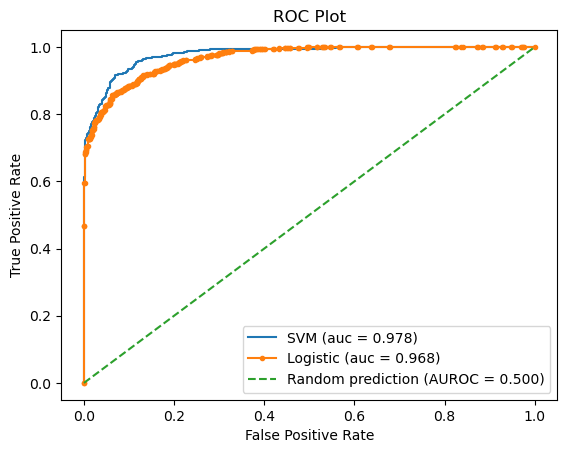

In [48]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

# Random prediction
r_probs = [0 for _ in range(len(Y_test))]
r_auc = roc_auc_score(Y_test, r_probs)
r_fpr, r_tpr, _ = roc_curve(Y_test, r_probs)

# Logistic 
Y_pred_proba = clf_LR.predict_proba(X_test)[::,1]
logistic_fpr, logistic_tpr, threshold = roc_curve(Y_test, Y_pred_proba)
auc_logistic = auc(logistic_fpr, logistic_tpr)

# SVM
Y2_pred_proba = clf_S.decision_function(X_test)
svm_fpr, svm_tpr, threshold = roc_curve(Y_test, Y2_pred_proba)
auc_svm = auc(svm_fpr, svm_tpr)



plt.plot(svm_fpr, svm_tpr, linestyle='-', label='SVM (auc = %0.3f)' % auc_svm)
plt.plot(logistic_fpr, logistic_tpr, marker='.', label='Logistic (auc = %0.3f)' % auc_logistic)
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)

plt.title('ROC Plot')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')


#add legend
plt.legend()
plt.show()


In [49]:
r_auc = roc_auc_score(Y_test, r_probs)
LR_auc = roc_auc_score(Y_test, Y_pred_proba)
SVC_auc = roc_auc_score(Y_test, Y2_pred_proba)

In [50]:
print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
print('logistic Regression: AUROC = %.3f' % (LR_auc))
print('SVM: AUROC = %.3f' % (SVC_auc))

Random (chance) Prediction: AUROC = 0.500
logistic Regression: AUROC = 0.968
SVM: AUROC = 0.978
